In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "/content"]).decode("utf8"))

import time
#print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

drive
sample_data



In [ ]:
from google.colab import drive
drive.mount('/content/drive') # Mount Google Drive to access files stored there & it will be mounted to the /content/drive directory

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
iris = pd.read_csv("/content/drive/MyDrive/Iris.csv") #load the dataset
# The pd.read_csv function from pandas is used to read the CSV file into a DataFrame


In [ ]:
iris.head(2) #shows the first 2 rows from the dataset


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [ ]:
iris.info()  #checking if there is any inconsistency in the dataset
#as we see there are no null values in the dataset, so the data can be processed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
iris.drop('Id',axis=1,inplace=True) #dropping the Id column as it is unecessary, axis=1 specifies that it should be column wise, inplace =1 means the changes should be reflected into the dataframe


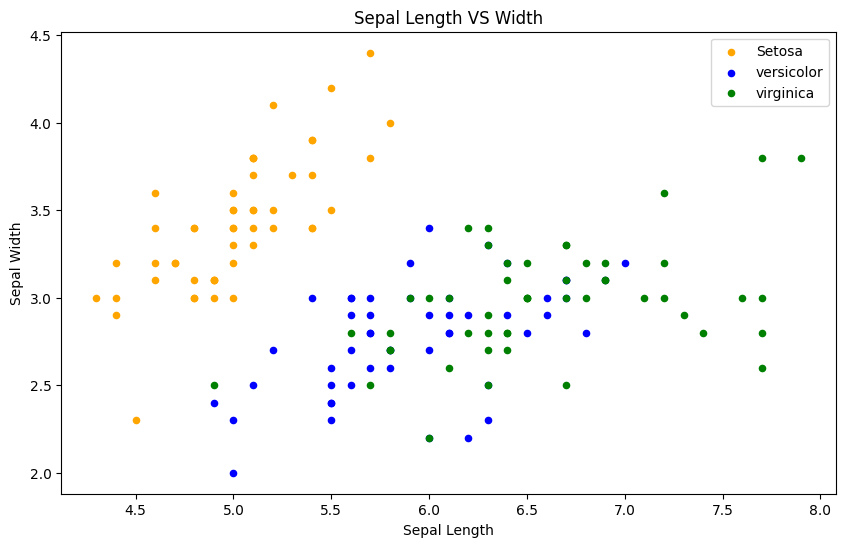

In [ ]:
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa') # Plot scatter plot for Iris-setosa species
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig) # Plot scatter plot for Iris-versicolor species on the same figure
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig) # Plot scatter plot for Iris-virginica species on the same figure
fig.set_xlabel("Sepal Length") # Set the X-axis label
fig.set_ylabel("Sepal Width") # Set the Y-axis label
fig.set_title("Sepal Length VS Width") # Set the title of the plot
fig=plt.gcf() # Get the current figure
fig.set_size_inches(10,6) # Set the size of the figure
plt.show() # Display the plot

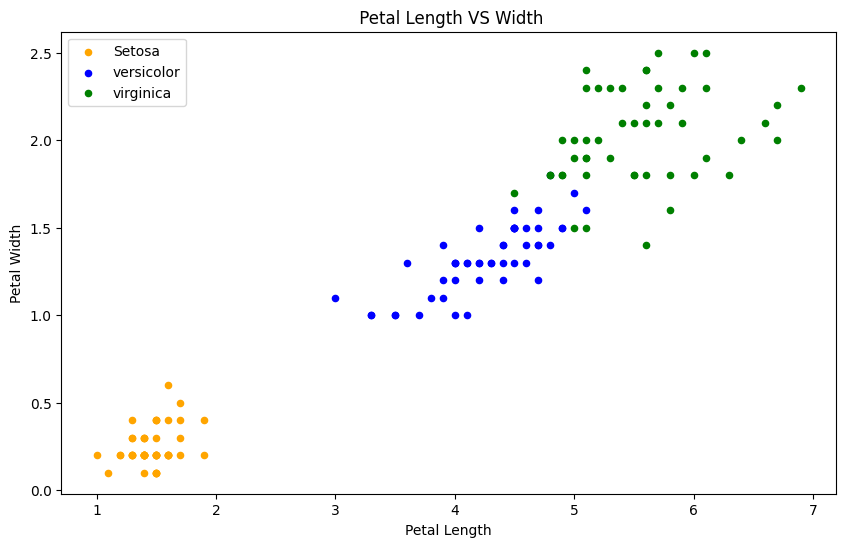

In [ ]:
fig = iris[iris.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

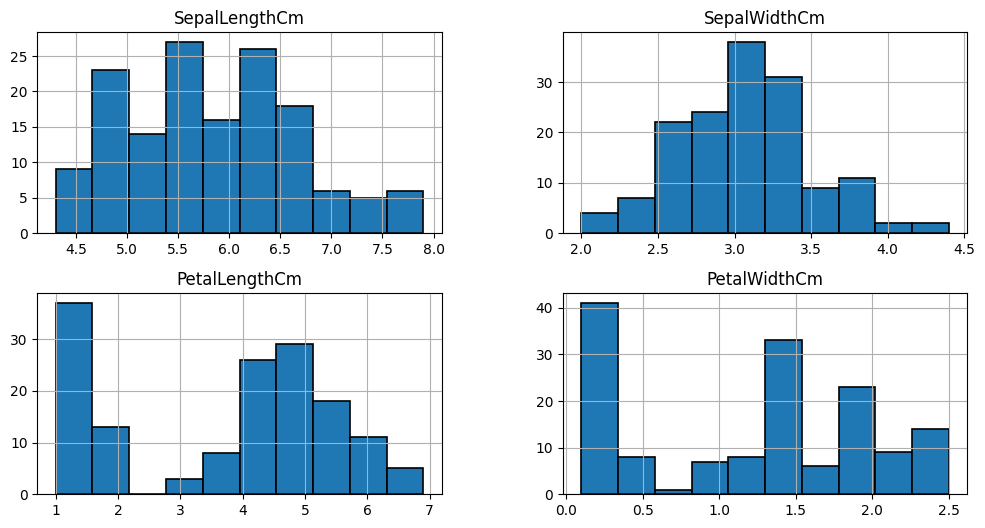

In [ ]:
iris.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

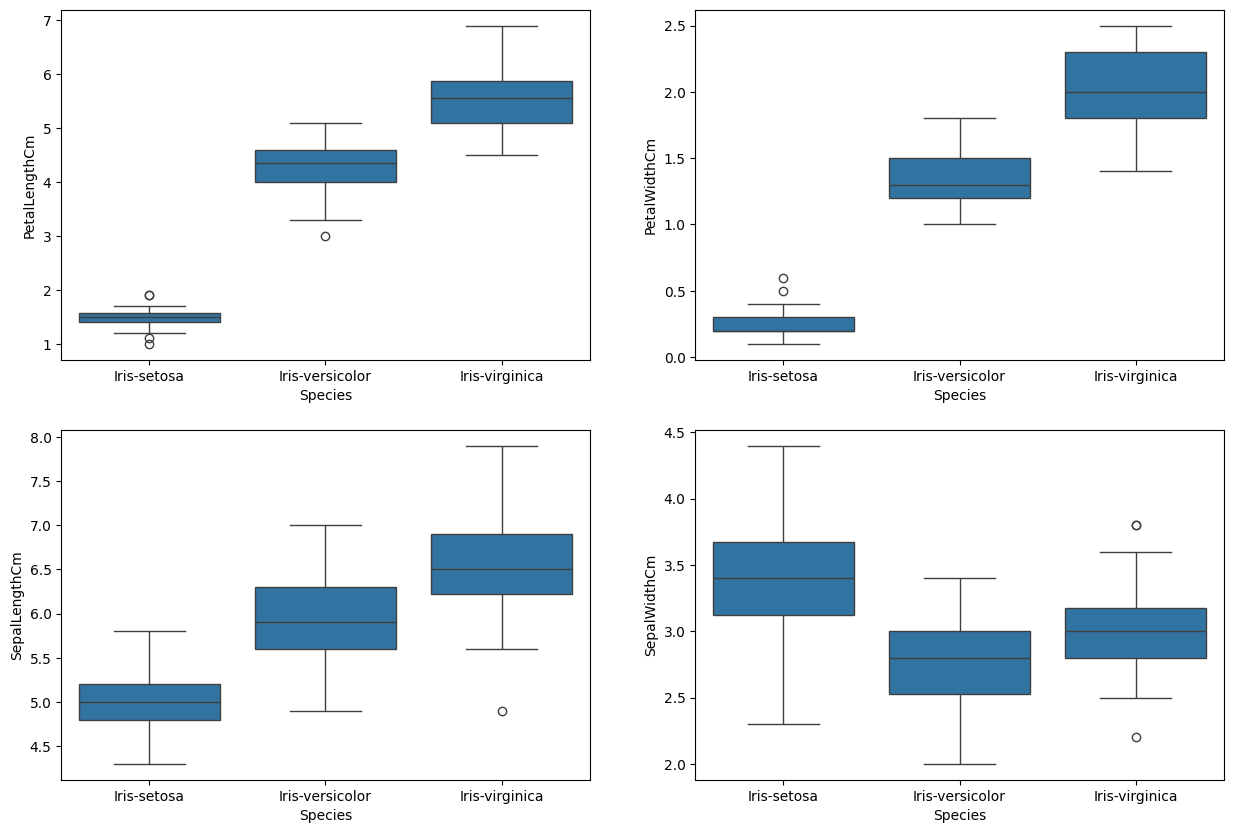

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.boxplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.boxplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.boxplot(x='Species',y='SepalWidthCm',data=iris)

In [ ]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm

In [ ]:
iris.shape #get the shape of the dataset


(150, 5)

In [ ]:
#iris.drop('Id', axis = 1, inplace = True)

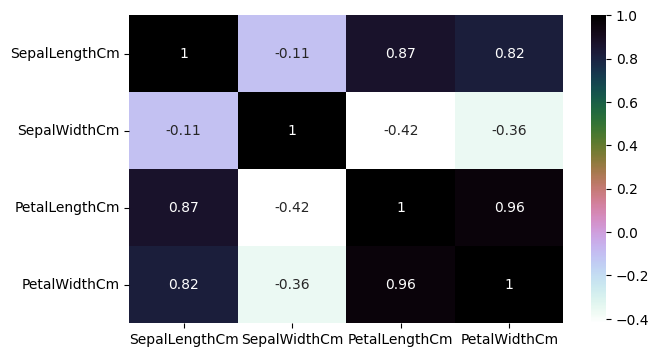

In [ ]:
plt.figure(figsize=(7,4))
sns.heatmap(iris.corr(numeric_only=True),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

In [ ]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
train_X, test_X, train_y, test_y = train_test_split(iris[['SepalLengthCm', 'SepalWidthCm','PetalLengthCm','PetalWidthCm' ]],iris['Species'], test_size = 0.3)


In [ ]:
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [ ]:
train_X.head(2)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
106,4.9,2.5,4.5,1.7
125,7.2,3.2,6.0,1.8


In [ ]:
test_X.head(2)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
145,6.7,3.0,5.2,2.3
117,7.7,3.8,6.7,2.2


In [ ]:
train_y.head()  ##output of the training data


106    Iris-virginica
125    Iris-virginica
144    Iris-virginica
25        Iris-setosa
47        Iris-setosa
Name: Species, dtype: object

In [ ]:
##Decision Tree
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Decision Tree is 0.9555555555555556


In [ ]:
# Function to train the model with a given learning rate
def train_decision_tree(train_X, test_X, train_y, test_y):
    # Create a Decision Tree model
    model = DecisionTreeClassifier()

    # Fit the model
    model.fit(train_X, train_y)

    # Measure the time to predict on test data
    start_time = time.time()  # Record start time before prediction
    prediction = model.predict(test_X)
    end_time = time.time()  # Record end time after prediction
    testing_time = end_time - start_time  # Calculate testing time

    # Calculate accuracy
    accuracy = metrics.accuracy_score(prediction, test_y)

    return accuracy, testing_time
# Train the Decision Tree with different learning rates
# Experiment with different learning rates
learning_rates = [0.001]
results = []

for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    accuracy, testing_time = train_decision_tree(train_X, test_X, train_y, test_y)
    results.append((lr, accuracy, testing_time))

# Print results
print("\nResults:")
for lr, accuracy, testing_time in results:
    print(f"Learning Rate: {lr} - Test Accuracy: {accuracy * 100:.2f}% - Testing Time: {testing_time:.4f} seconds")


Training with learning rate: 0.001

Results:
Learning Rate: 0.001 - Test Accuracy: 97.78% - Testing Time: 0.0031 seconds
